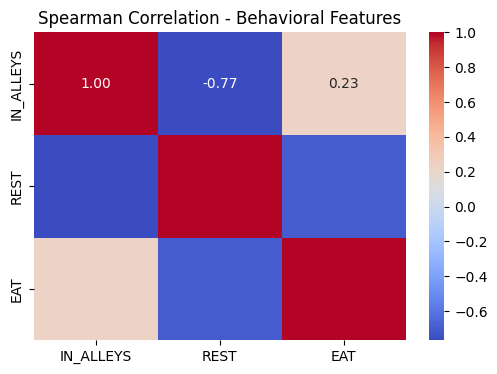

C:\Users\lamia\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


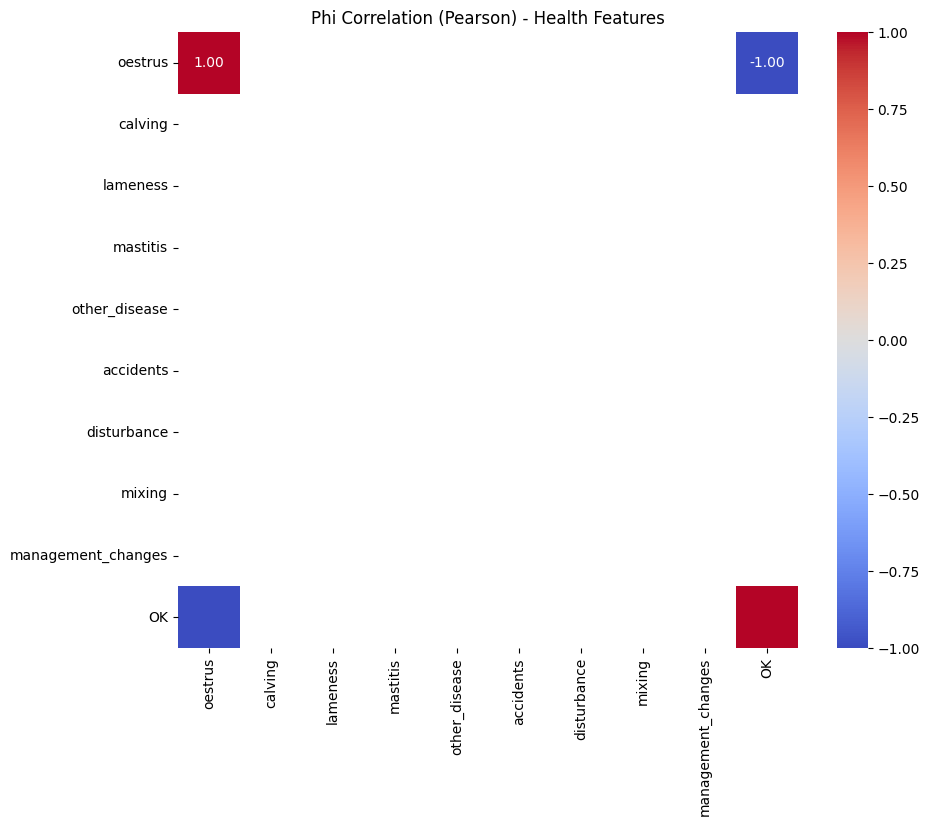

C:\Users\lamia\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


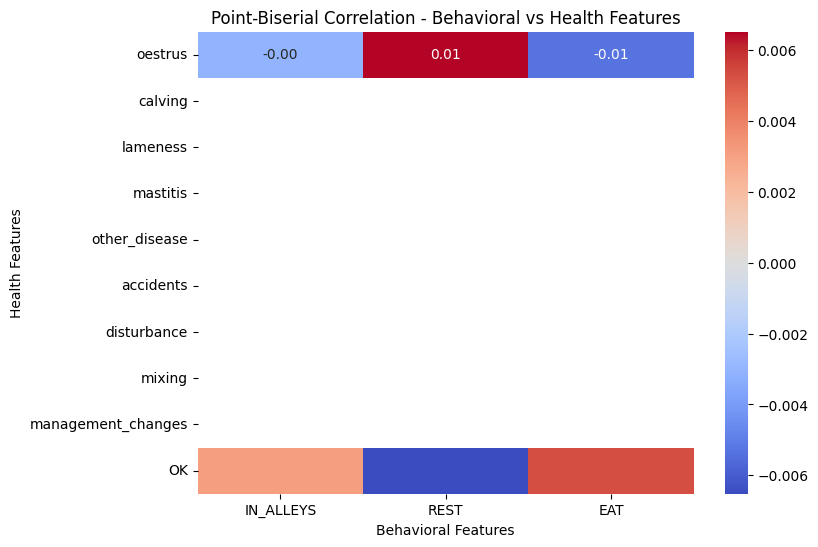

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pointbiserialr
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Users\lamia\Downloads\dataset3-1 (1).csv")

# Drop irrelevant or empty columns
df = df.drop(columns=["cow", "date", "LPS", "acidosis", "ACTIVITY_LEVEL"])

# Define columns
behavioral_features = ['IN_ALLEYS', 'REST', 'EAT']
health_features = ['oestrus', 'calving', 'lameness', 'mastitis', 'other_disease',
                   'accidents', 'disturbance', 'mixing', 'management_changes', 'OK']

# --- 1. Spearman Correlation between Behavioral Features ---
behavior_corr = df[behavioral_features].corr(method='spearman')

plt.figure(figsize=(6, 4))
sns.heatmap(behavior_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation - Behavioral Features")
plt.show()

# --- 2. Pearson Correlation (Phi) between Health Features ---
health_corr = df[health_features].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(health_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Phi Correlation (Pearson) - Health Features")
plt.show()

# --- 3. Point-Biserial Correlation: Behavioral vs Health States ---
point_biserial_matrix = pd.DataFrame(index=health_features, columns=behavioral_features)

for h in health_features:
    for b in behavioral_features:
        valid_data = df[[b, h]].dropna()
        if valid_data[h].nunique() > 1:  # Ensure variable is not constant
            corr, _ = pointbiserialr(valid_data[h], valid_data[b])
            point_biserial_matrix.loc[h, b] = corr
        else:
            point_biserial_matrix.loc[h, b] = np.nan

point_biserial_matrix = point_biserial_matrix.astype(float)

plt.figure(figsize=(8, 6))
sns.heatmap(point_biserial_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Point-Biserial Correlation - Behavioral vs Health Features")
plt.xlabel("Behavioral Features")
plt.ylabel("Health Features")
plt.show()


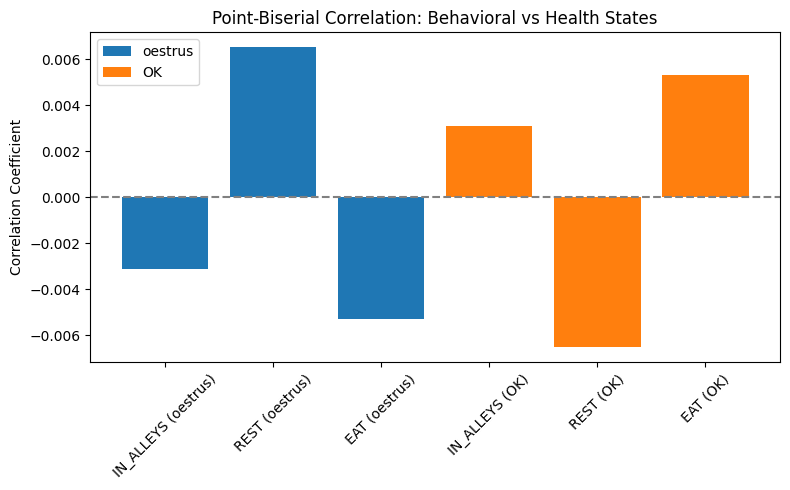

In [ ]:


# Collect correlations
correlation_data = []

for h in health_features:
    for b in behavioral_features:
        valid_data = df[[b, h]].dropna()
        if valid_data[h].nunique() > 1:
            corr, pval = pointbiserialr(valid_data[h], valid_data[b])
            correlation_data.append({
                'Health State': h,
                'Behavioral Feature': b,
                'Correlation': corr,
                'p-value': pval
            })

# Convert to DataFrame
corr_df = pd.DataFrame(correlation_data)

# Plot
plt.figure(figsize=(8, 5))
for health_state in corr_df["Health State"].unique():
    subset = corr_df[corr_df["Health State"] == health_state]
    plt.bar(subset["Behavioral Feature"] + f" ({health_state})", subset["Correlation"], label=health_state)

plt.axhline(0, color='gray', linestyle='--')
plt.title("Point-Biserial Correlation: Behavioral vs Health States")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


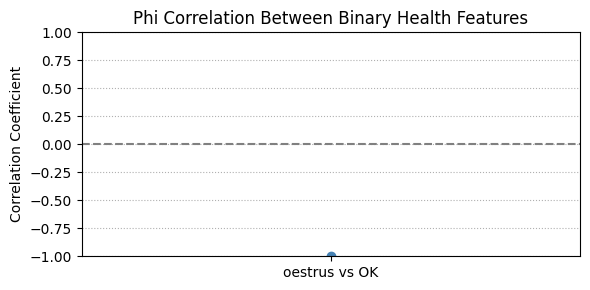

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

phi_corr = df[["oestrus", "OK"]].corr(method="pearson").iloc[0, 1]

# Prepare plot
plt.figure(figsize=(6, 3))
x = ["oestrus vs OK"]
y = [phi_corr]

# Lollipop style plot
plt.plot(x, y, marker='o', linestyle='-', color='steelblue')
plt.axhline(0, color='gray', linestyle='--')
plt.ylim(-1, 1)
plt.title("Phi Correlation Between Binary Health Features")
plt.ylabel("Correlation Coefficient")
plt.grid(axis='y', linestyle=':')
plt.tight_layout()
plt.show()


In [ ]:
phi_table = pd.DataFrame({
    "Feature Pair": ["oestrus vs OK"],
    "Phi Correlation": [phi_corr]
})
print(phi_table)


    Feature Pair  Phi Correlation
0  oestrus vs OK             -1.0
